# Week 7 Practice Solution 1: Clustering on Handwritten Digits

**Dataset**: Digits (64 features, 1797 samples, 10 digit classes)

We use clustering **without labels** to discover natural groupings.

## 1. Imports and Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

plt.style.use('default')
sns.set_palette('husl')
np.random.seed(42)

In [3]:
digits = datasets.load_digits()
X = digits.data
y_true = digits.target  # Only for later comparison, not for clustering
n_samples, n_features = X.shape

print('Digits dataset shape:', X.shape)
print('Features (pixels):', n_features)
print('Unique true labels (digits 0-9):', len(np.unique(y_true)))

Digits dataset shape: (1797, 64)
Features (pixels): 64
Unique true labels (digits 0-9): 10


## 2. Standardize the Data

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('Standardized: mean ≈ 0, std ≈ 1')
print('Mean (first 5 features):', X_scaled[:, :5].mean(axis=0).round(4))
print('Std  (first 5 features):', X_scaled[:, :5].std(axis=0).round(4))

Standardized: mean ≈ 0, std ≈ 1
Mean (first 5 features): [ 0. -0. -0. -0.  0.]
Std  (first 5 features): [0. 1. 1. 1. 1.]


## 3. Choose Number of Clusters: Elbow and Silhouette

/Users/avirup/Desktop/UCB-AIMLrepo/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/avirup/Desktop/UCB-AIMLrepo/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/avirup/Desktop/UCB-AIMLrepo/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/avirup/Desktop/UCB-AIMLrepo/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/avirup/Desktop/UCB-AIMLrepo/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/avirup/Desktop/UCB-AIMLrepo/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWar

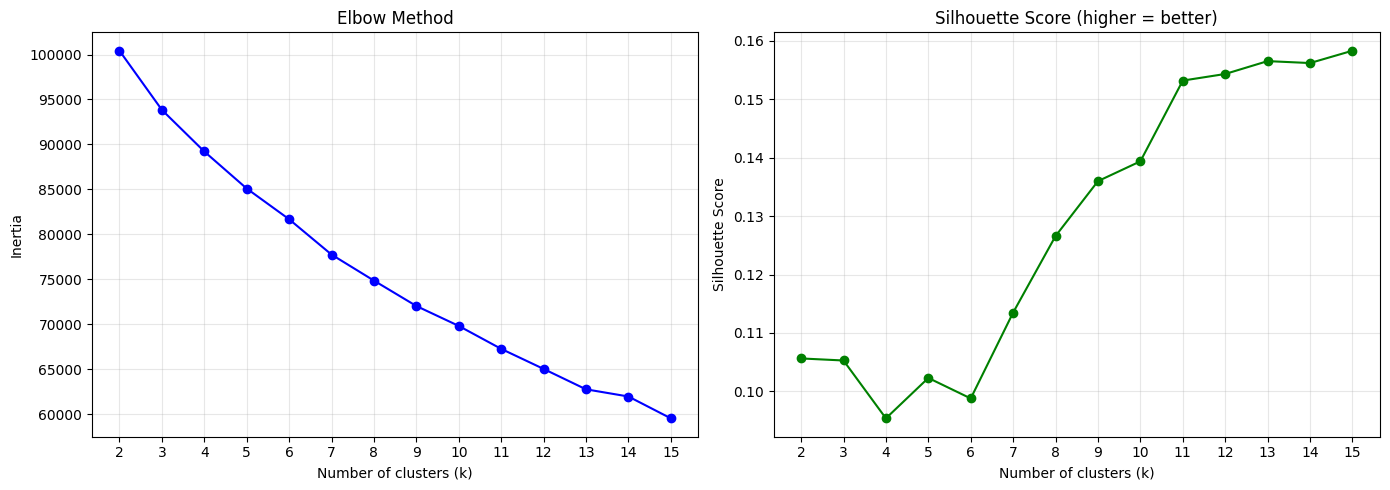

Best k by silhouette: 15
We use k=10 for comparison with true 10 digits; elbow is gradual so k=10 is reasonable.


In [5]:
K_range = range(2, 16)
inertias = []
silhouettes = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].set_xticks(K_range)
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouettes, 'go-')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score (higher = better)')
axes[1].set_xticks(K_range)
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

best_k_sil = list(K_range)[np.argmax(silhouettes)]
print(f'Best k by silhouette: {best_k_sil}')
print('We use k=10 for comparison with true 10 digits; elbow is gradual so k=10 is reasonable.')

## 4. K-Means with k=10

In [ ]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

print('K-Means cluster sizes:')
for i in range(k):
    print(f'  Cluster {i}: {(kmeans_labels == i).sum()} samples')

In [ ]:
# 2D plot: use first two features (or first two PCs for better separation)
from sklearn.decomposition import PCA
pca_vis = PCA(n_components=2)
X_2d = pca_vis.fit_transform(X_scaled)
centers_2d = pca_vis.transform(centers_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_labels, cmap='tab10', s=15, alpha=0.6)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], c='black', marker='X', s=200, linewidths=2, label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering (k=10) in 2D PCA space')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Hierarchical Clustering and Dendrogram

In [ ]:
sample_size = 100
idx = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sample = X_scaled[idx]

linkage_matrix = linkage(X_sample, method='ward')
plt.figure(figsize=(14, 6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram (Ward, sample of 100)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [ ]:
hier = AgglomerativeClustering(n_clusters=k, linkage='ward')
hier_labels = hier.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=hier_labels, cmap='tab10', s=15, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering (k=10, Ward) in 2D PCA space')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Compare K-Means vs Hierarchical (and True Labels)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=y_true, cmap='tab10', s=15, alpha=0.6)
axes[0].set_title('True labels (digits 0-9)')
axes[0].set_xlabel('PC1')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_labels, cmap='tab10', s=15, alpha=0.6)
axes[1].set_title('K-Means (k=10)')
axes[1].set_xlabel('PC1')
axes[1].grid(True, alpha=0.3)

axes[2].scatter(X_2d[:, 0], X_2d[:, 1], c=hier_labels, cmap='tab10', s=15, alpha=0.6)
axes[2].set_title('Hierarchical (k=10)')
axes[2].set_xlabel('PC1')
axes[2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
ari_hier = adjusted_rand_score(y_true, hier_labels)
print(f'Adjusted Rand Index (vs true labels): K-Means = {ari_kmeans:.4f}, Hierarchical = {ari_hier:.4f}')
print('(ARI in [0,1]; higher means clusters agree more with true classes.)')

## 7. Summary

- **Choice of k**: Elbow is gradual for digits; silhouette often peaks around k=9–10. Using k=10 matches the number of digit classes.
- **K-Means vs Hierarchical**: Both produce plausible segmentations; ARI shows how much each agrees with true digits (without using labels during clustering).
- **Takeaway**: On this 64-dimensional data, standardizing and using 2D PCA for visualization helps compare methods; clusters often partially align with digit identity.